# Introduction

EDA of training data: ATL flights data in 2017 and 2018.

# Set up Environment

In [1]:
import pandas as pd

# be able to view all columns of dataframes
pd.options.display.max_columns = None

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# Load Data

In [2]:
data_folder = '../data/raw/training_data/'
df = pd.read_csv(data_folder + 'training_data_ATL.zip')

# Process

In [3]:
# remove the Unnamed column
df.drop(df.columns[df.columns.str.contains('unnamed', case=False)], axis=1, inplace=True)

# ignore airport traffic data as of now
feature_list = ['Num_Arr_SLDT-30', 'Num_Arr_SLDT-25', 'Num_Arr_SLDT-20', 'Num_Arr_SLDT-15', 'Num_Arr_SLDT-10',\
                'Num_Arr_SLDT-5', 'Num_Arr_SLDT-0', 'Num_Arr_SLDT+5', 'Num_Arr_SLDT+10', 'Num_Arr_SLDT+15',\
                'Num_Arr_SLDT+20', 'Num_Arr_SLDT+25', 'Num_Dep_SLDT-30', 'Num_Dep_SLDT-25', 'Num_Dep_SLDT-20',\
                'Num_Dep_SLDT-15', 'Num_Dep_SLDT-10', 'Num_Dep_SLDT-5', 'Num_Dep_SLDT-0', 'Num_Dep_SLDT+5',\
                'Num_Dep_SLDT+10', 'Num_Dep_SLDT+15', 'Num_Dep_SLDT+20', 'Num_Dep_SLDT+25']

arrivals = df.copy()
for feature in feature_list:
    arrivals = arrivals.drop(labels=feature, axis=1)

In [4]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744979 entries, 0 to 744978
Data columns (total 60 columns):
Year                               744979 non-null int64
Quarter                            744979 non-null int64
Month                              744979 non-null int64
DayofMonth                         744979 non-null int64
DayOfWeek                          744979 non-null int64
FlightDate                         744979 non-null object
Reporting_Airline                  744979 non-null object
DOT_ID_Reporting_Airline           744979 non-null int64
IATA_CODE_Reporting_Airline        744979 non-null object
Tail_Number                        744979 non-null object
Flight_Number_Reporting_Airline    744979 non-null int64
OriginAirportID                    744979 non-null int64
OriginAirportSeqID                 744979 non-null int64
OriginCityMarketID                 744979 non-null int64
Origin                             744979 non-null object
OriginCityName               

In [124]:
segment = arrivals[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'ArrivalDate',\
                    'Reporting_Airline', 'OriginAirportID', 'OriginCityName', 'OriginState',\
                    'CRSDepTime', 'DepTime', 'DepDelay', 'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',\
                    'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay', 'ArrDel15',\
                    'ArrivalDelayGroups', 'ArrTimeBlk', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime',\
                    'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',\
                    'LateAircraftDelay']]

In [125]:
segment.head(3)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,ArrivalDate,Reporting_Airline,OriginAirportID,OriginCityName,OriginState,CRSDepTime,DepTime,DepDelay,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,CRSElapsedTime,ActualElapsedTime,AirTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2017,1,1,1,7,2017-01-01 00:00:00,2017-01-01 00:00:00,AA,11298,"Dallas/Fort Worth, TX",TX,14:25:00,1430.0,5.0,0.0,0.0,1400-1459,12.0,1442.0,1717.0,10.0,17:26:00,1727.0,1.0,0.0,0.0,1700-1759,121.0,117.0,95.0,731.0,3,NaN,NaN,NaN,NaN,NaN
1,2017,1,1,2,1,2017-01-02 00:00:00,2017-01-02 00:00:00,AA,11298,"Dallas/Fort Worth, TX",TX,14:25:00,1420.0,-5.0,0.0,-1.0,1400-1459,13.0,1433.0,1723.0,11.0,17:26:00,1734.0,8.0,0.0,0.0,1700-1759,121.0,134.0,110.0,731.0,3,NaN,NaN,NaN,NaN,NaN
2,2017,1,1,3,2,2017-01-03 00:00:00,2017-01-03 00:00:00,AA,11298,"Dallas/Fort Worth, TX",TX,14:25:00,1426.0,1.0,0.0,0.0,1400-1459,14.0,1440.0,1718.0,5.0,17:26:00,1723.0,-3.0,0.0,-1.0,1700-1759,121.0,117.0,98.0,731.0,3,NaN,NaN,NaN,NaN,NaN


In [126]:
# rename some column names
segment = segment.rename(columns={'DayOfWeek': 'DayofWeek', 'FlightDate': 'SOBTDate', 'ArrivalDate': 'SIBTDate',\
                                  'Reporting_Airline': 'UniqueCarrierCode', 'CRSDepTime': 'SOBT', 'DepTime': 'AOBT',\
                                  'DepDelay': 'OBTDelay', 'DepDel15': 'OBTDel15', 'DepartureDelayGroups': 'OBTDelayGroups',\
                                  'DepTimeBlk': 'OBTTimeBlk', 'TaxiOut': 'AXOT', 'WheelsOff': 'ATOT', 'WheelsOn': 'ALDT',\
                                  'TaxiIn': 'AXIT', 'CRSArrTime': 'SIBT', 'ArrTime': 'AIBT', 'ArrDelay': 'IBTDelay',\
                                  'ArrDel15': 'IBTDel15', 'ArrivalDelayGroups': 'IBTDelayGroups',\
                                  'ArrTimeBlk': 'IBTTimeBlk', 'CRSElapsedTime': 'SOBTtoSIBT',\
                                  'ActualElapsedTime': 'AOBTtoAIBT', 'AirTime': 'AirborneTime'})

In [130]:
# convert scheduled times to datetime objects
date_list = ['SOBTDate', 'SIBTDate']
for date in date_list:
    segment[date] = segment[date].apply(lambda x: pd.to_datetime(x)).dt.date
    
timing_list = ['SOBT', 'SIBT']
for timing in timing_list:
    segment[timing] = segment[timing].apply(lambda x: pd.to_datetime(x, format='%H:%M:%S')).dt.time

In [131]:
timing_list = ['AOBT', 'ATOT', 'ALDT', 'AIBT']

for timing in timing_list:
    segment[timing] = segment[timing].apply(lambda x: str(int(x)).zfill(4))
    
max(segment['AOBT'])
# '2400'cannot be handled by pd.to_datetime()

'2400'

In [132]:
segment[segment['AOBT']=='2400'].head(3)

,Year,Quarter,Month,DayofMonth,DayofWeek,SOBTDate,SIBTDate,UniqueCarrierCode,OriginAirportID,OriginCityName,OriginState,SOBT,AOBT,OBTDelay,OBTDel15,OBTDelayGroups,OBTTimeBlk,AXOT,ATOT,ALDT,AXIT,SIBT,AIBT,IBTDelay,IBTDel15,IBTDelayGroups,IBTTimeBlk,SOBTtoSIBT,AOBTtoAIBT,AirborneTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
33760,2017,4,10,2,1,2017-10-02,2017-10-03,DL,14771,"San Francisco, CA",CA,23:55:00,2400,5.0,0.0,0.0,2300-2359,17.0,0017,0703,10.0,07:21:00,0713,-8.0,0.0,-1.0,0700-0759,266.0,253.0,226.0,2139.0,9,NaN,NaN,NaN,NaN,NaN
48345,2017,4,10,20,5,2017-10-20,2017-10-21,DL,12889,"Las Vegas, NV",NV,23:56:00,2400,4.0,0.0,0.0,2300-2359,16.0,0016,0629,7.0,06:35:00,0636,1.0,0.0,0.0,0600-0659,219.0,216.0,193.0,1747.0,7,NaN,NaN,NaN,NaN,NaN
65078,2017,4,11,23,4,2017-11-23,2017-11-24,DL,14869,"Salt Lake City, UT",UT,23:59:00,2400,1.0,0.0,0.0,2300-2359,48.0,0048,0544,7.0,05:36:00,0551,15.0,1.0,1.0,0001-0559,217.0,231.0,176.0,1590.0,7,0.0,0.0,15.0,0.0,0.0


In [133]:
one_day = pd.Timedelta('1 days')

segment['AOBTDate'] = segment['SOBTDate']
segment.loc[segment.AOBT=='2400', "AOBTDate"] = segment['AOBTDate'] + one_day
segment.loc[segment.AOBT=='2400', "AOBT"] = '0000'

In [135]:
segment[segment['ATOT']=='2400'].head(3)

,Year,Quarter,Month,DayofMonth,DayofWeek,SOBTDate,SIBTDate,UniqueCarrierCode,OriginAirportID,OriginCityName,OriginState,SOBT,AOBT,OBTDelay,OBTDel15,OBTDelayGroups,OBTTimeBlk,AXOT,ATOT,ALDT,AXIT,SIBT,AIBT,IBTDelay,IBTDel15,IBTDelayGroups,IBTTimeBlk,SOBTtoSIBT,AOBTtoAIBT,AirborneTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AOBTDate
4734,2017,1,1,29,7,2017-01-29,2017-01-29,DL,11057,"Charlotte, NC",NC,19:45:00,2341,236.0,1.0,12.0,1900-1959,19.0,2400,0041,10.0,21:11:00,0051,220.0,1.0,12.0,2100-2159,86.0,70.0,41.0,226.0,1,217.0,0.0,0.0,0.0,3.0,2017-01-29
4749,2017,1,1,29,7,2017-01-29,2017-01-29,DL,15412,"Knoxville, TN",TN,19:16:00,2350,274.0,1.0,12.0,1900-1959,10.0,2400,0029,11.0,20:30:00,0040,250.0,1.0,12.0,2000-2059,74.0,50.0,29.0,152.0,1,250.0,0.0,0.0,0.0,0.0,2017-01-29
7270,2017,1,1,8,7,2017-01-08,2017-01-09,DL,12892,"Los Angeles, CA",CA,23:35:00,2341,6.0,0.0,0.0,2300-2359,19.0,2400,0631,10.0,06:47:00,0641,-6.0,0.0,-1.0,0600-0659,252.0,240.0,211.0,1946.0,8,NaN,NaN,NaN,NaN,NaN,2017-01-08


In [136]:
segment['ATOTDate'] = segment['SOBTDate']
segment.loc[segment.ATOT=='2400', "ATOTDate"] = segment['ATOTDate'] + one_day
segment.loc[segment.ATOT=='2400', "ATOT"] = '0000'

In [138]:
segment[segment['ALDT']=='2400'].head(3)

,Year,Quarter,Month,DayofMonth,DayofWeek,SOBTDate,SIBTDate,UniqueCarrierCode,OriginAirportID,OriginCityName,OriginState,SOBT,AOBT,OBTDelay,OBTDel15,OBTDelayGroups,OBTTimeBlk,AXOT,ATOT,ALDT,AXIT,SIBT,AIBT,IBTDelay,IBTDel15,IBTDelayGroups,IBTTimeBlk,SOBTtoSIBT,AOBTtoAIBT,AirborneTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AOBTDate,ATOTDate
149,2017,1,1,16,1,2017-01-16,2017-01-16,AS,14747,"Seattle, WA",WA,16:15:00,1618,3.0,0.0,0.0,1600-1659,18.0,1636,2400,7.0,23:59:00,0007,8.0,0.0,0.0,2300-2359,284.0,289.0,264.0,2182.0,9,NaN,NaN,NaN,NaN,NaN,2017-01-16,2017-01-16
6753,2017,1,1,23,1,2017-01-23,2017-01-23,WN,11278,"Washington, DC",VA,20:55:00,2230,95.0,1.0,6.0,2000-2059,14.0,2244,2400,8.0,22:55:00,0008,73.0,1.0,4.0,2200-2259,120.0,98.0,76.0,547.0,3,0.0,0.0,0.0,0.0,73.0,2017-01-23,2017-01-23
13357,2017,1,1,7,6,2017-01-07,2017-01-07,DL,11618,"Newark, NJ",NJ,16:45:00,2037,232.0,1.0,12.0,1600-1659,87.0,2204,2400,12.0,19:23:00,0012,289.0,1.0,12.0,1900-1959,158.0,215.0,116.0,746.0,3,0.0,15.0,57.0,0.0,217.0,2017-01-07,2017-01-07


In [139]:
segment['ALDTDate'] = segment['SIBTDate']
segment.loc[segment.ALDT=='2400', "ALDTDate"] = segment['ALDTDate'] + one_day
segment.loc[segment.ALDT=='2400', "ALDT"] = '0000'

In [142]:
segment[segment['AIBT']=='2400'].head(3)

,Year,Quarter,Month,DayofMonth,DayofWeek,SOBTDate,SIBTDate,UniqueCarrierCode,OriginAirportID,OriginCityName,OriginState,SOBT,AOBT,OBTDelay,OBTDel15,OBTDelayGroups,OBTTimeBlk,AXOT,ATOT,ALDT,AXIT,SIBT,AIBT,IBTDelay,IBTDel15,IBTDelayGroups,IBTTimeBlk,SOBTtoSIBT,AOBTtoAIBT,AirborneTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AOBTDate,ATOTDate,ALDTDate
12257,2017,1,1,1,7,2017-01-01,2017-01-01,AA,13303,"Miami, FL",FL,21:43:00,2206,23.0,1.0,1.0,2100-2159,17.0,2223,2351,9.0,23:49:00,2400,11.0,0.0,0.0,2300-2359,126.0,114.0,88.0,594.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-01,2017-01-01,2017-01-01
12268,2017,1,1,13,5,2017-01-13,2017-01-13,AA,13303,"Miami, FL",FL,21:41:00,2201,20.0,1.0,1.0,2100-2159,24.0,2225,2351,9.0,23:42:00,2400,18.0,1.0,1.0,2300-2359,121.0,119.0,86.0,594.0,3,18.0,0.0,0.0,0.0,0.0,2017-01-13,2017-01-13,2017-01-13
13264,2017,1,1,7,6,2017-01-07,2017-01-07,DL,11433,"Detroit, MI",MI,20:18:00,2153,95.0,1.0,6.0,2000-2059,37.0,2230,2356,4.0,22:29:00,2400,91.0,1.0,6.0,2200-2259,131.0,127.0,86.0,594.0,3,86.0,0.0,0.0,0.0,5.0,2017-01-07,2017-01-07,2017-01-07


In [143]:
segment['AIBTDate'] = segment['SIBTDate']
segment.loc[segment.AIBT=='2400', "AIBTDate"] = segment['AIBTDate'] + one_day
segment.loc[segment.AIBT=='2400', "AIBT"] = '0000'

In [146]:
for timing in timing_list:
    segment[timing] = segment[timing].apply(lambda x: pd.to_datetime(x, format='%H%M')).dt.time

In [150]:
segment.head(3)

,Year,Quarter,Month,DayofMonth,DayofWeek,SOBTDate,SIBTDate,UniqueCarrierCode,OriginAirportID,OriginCityName,OriginState,SOBT,AOBT,OBTDelay,OBTDel15,OBTDelayGroups,OBTTimeBlk,AXOT,ATOT,ALDT,AXIT,SIBT,AIBT,IBTDelay,IBTDel15,IBTDelayGroups,IBTTimeBlk,SOBTtoSIBT,AOBTtoAIBT,AirborneTime,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,AOBTDate,ATOTDate,ALDTDate,AIBTDate
0,2017,1,1,1,7,2017-01-01,2017-01-01,AA,11298,"Dallas/Fort Worth, TX",TX,14:25:00,14:30:00,5.0,0.0,0.0,1400-1459,12.0,14:42:00,17:17:00,10.0,17:26:00,17:27:00,1.0,0.0,0.0,1700-1759,121.0,117.0,95.0,731.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-01,2017-01-01,2017-01-01,2017-01-01
1,2017,1,1,2,1,2017-01-02,2017-01-02,AA,11298,"Dallas/Fort Worth, TX",TX,14:25:00,14:20:00,-5.0,0.0,-1.0,1400-1459,13.0,14:33:00,17:23:00,11.0,17:26:00,17:34:00,8.0,0.0,0.0,1700-1759,121.0,134.0,110.0,731.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-02,2017-01-02,2017-01-02,2017-01-02
2,2017,1,1,3,2,2017-01-03,2017-01-03,AA,11298,"Dallas/Fort Worth, TX",TX,14:25:00,14:26:00,1.0,0.0,0.0,1400-1459,14.0,14:40:00,17:18:00,5.0,17:26:00,17:23:00,-3.0,0.0,-1.0,1700-1759,121.0,117.0,98.0,731.0,3,NaN,NaN,NaN,NaN,NaN,2017-01-03,2017-01-03,2017-01-03,2017-01-03


In [157]:
# merge date & time
list_1 = ['SOBTDate', 'SIBTDate', 'AOBTDate', 'ATOTDate', 'ALDTDate', 'AIBTDate']
list_2 = ['SOBT', 'SIBT', 'AOBT', 'ATOT', 'ALDT', 'AIBT']

for i in range(6):
    segment[list_2[i]] = segment.apply(lambda r: pd.datetime.combine(r[list_1[i]], r[list_2[i]]), 1)
    segment = segment.drop(labels=list_1[i], axis = 1)

In [164]:
# convert float to int
to_int = ['OBTDelay', 'OBTDel15', 'OBTDelayGroups', 'AXOT', 'AXIT', 'IBTDelay', 'IBTDel15', 'IBTDelayGroups',\
          'SOBTtoSIBT', 'AOBTtoAIBT', 'AirborneTime', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay',\
          'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

for item in to_int:
    segment[item] = segment[item].fillna(0).apply(lambda x: int(x))
    segment[item] = segment[item].apply(lambda x: int(x))

# Explore

In [166]:
print('Arrival flights come from ' + str(len(segment['OriginAirportID'].unique())) + ' different airports.')
print('And they belong to these airlines: ', segment['UniqueCarrierCode'].unique())

Arrival flights come from 168 different airports.
And they belong to these airlines:  ['AA' 'AS' 'DL' 'F9' 'NK' 'OO' 'UA' 'WN' 'EV' 'B6' '9E' 'MQ' 'OH' 'YV'
 'YX']


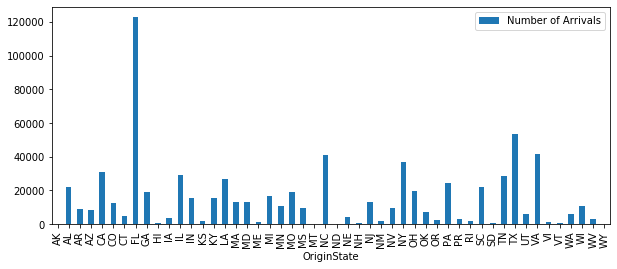

In [167]:
state_flights = segment.groupby(['OriginState'])[['Year']].count().rename(columns={'Year':'Number of Arrivals'})
state_flights.plot.bar(figsize=(10,4))

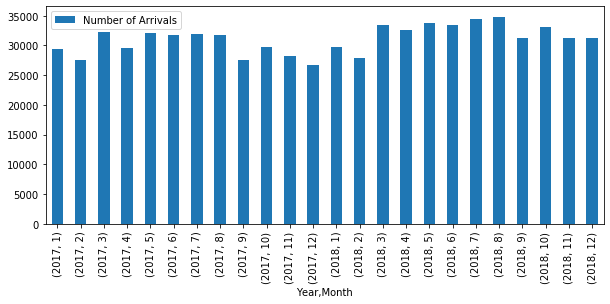

In [168]:
monthly_flights = segment.groupby(['Year','Month'])[['Year']].count().rename(columns={'Year':'Number of Arrivals'})
monthly_flights.plot.bar(figsize=(10,4))

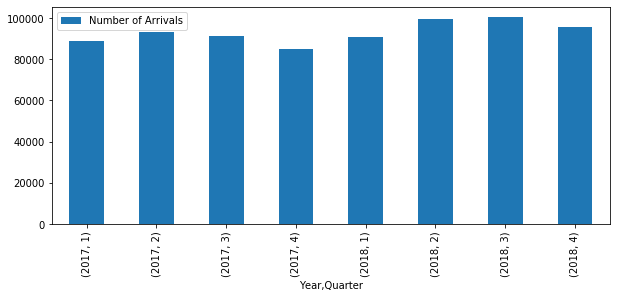

In [169]:
quarter_flights = segment.groupby(['Year','Quarter'])[['Year']].count().rename(columns={'Year':'Number of Arrivals'})
quarter_flights.plot.bar(figsize=(10,4))

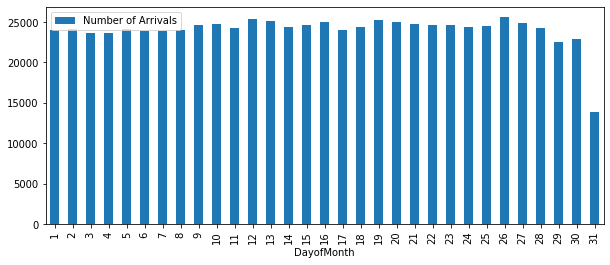

In [170]:
monthday_flights = segment.groupby(['DayofMonth'])[['Year']].count().rename(columns={'Year':'Number of Arrivals'})
monthday_flights.plot.bar(figsize=(10,4))

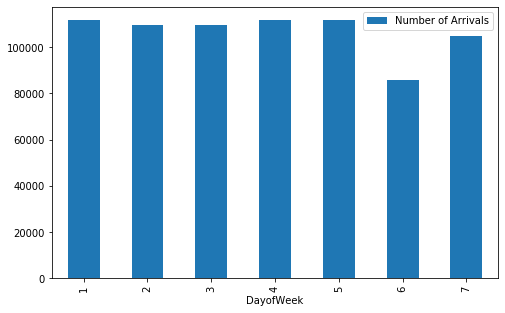

In [173]:
weekday_flights = segment.groupby(['DayofWeek'])[['Year']].count().rename(columns={'Year':'Number of Arrivals'})
weekday_flights.plot.bar(figsize=(8,5))